<a href="https://colab.research.google.com/github/signife/VentureStartUp/blob/main/04_24_DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn import preprocessing

In [5]:
target = ['apple', 'apple', 'banana', 'apple', 'orange']

label_encoder = preprocessing.LabelEncoder()
# label_encoder.fit(target)
# label_encoder.transform(target)
label_encoder.fit_transform(target)


array([0, 0, 1, 0, 2])

In [6]:
label_encoder.classes_

array(['apple', 'banana', 'orange'], dtype='<U6')

In [9]:
from sklearn.datasets import load_iris
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

iris_data = load_iris()

In [24]:
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size = 0.2, shuffle = True, random_state = 34, stratify = iris_data.target)



In [11]:
from sklearn.linear_model import LogisticRegression

In [16]:
model = LogisticRegression()

score = cross_val_score(model, X_train, y_train, cv =5) #교차검증
print(score)
import numpy as np
print(np.mean(score))

[0.95833333 0.95833333 1.         1.         0.91666667]
0.9666666666666668


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data,iris_data.target, test_size = 0.2 , random_state = 34, shuffle = True)

In [18]:
model = DecisionTreeClassifier()

In [25]:
parameters = {'max_depth':[1,2,3],'min_samples_split':[2,3]}

grid_model = GridSearchCV(model, param_grid = parameters, cv = 5, refit = True)

grid_model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 2, 3], 'min_samples_split': [2, 3]})

In [26]:
grid_model.cv_results_

{'mean_fit_time': array([0.00141659, 0.00064082, 0.00063567, 0.00061259, 0.00060606,
        0.00060282]),
 'std_fit_time': array([1.43365431e-03, 1.00617431e-04, 5.10935855e-05, 1.43658620e-05,
        1.18434294e-05, 8.10426800e-06]),
 'mean_score_time': array([0.00069623, 0.00051255, 0.00050917, 0.00049706, 0.00048256,
        0.00047455]),
 'std_score_time': array([3.01524364e-04, 2.46679250e-05, 3.62924768e-05, 1.65149574e-05,
        6.35643785e-06, 7.08965618e-06]),
 'param_max_depth': masked_array(data=[1, 1, 2, 2, 3, 3],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_min_samples_split': masked_array(data=[2, 3, 2, 3, 2, 3],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 1, 'min_samples_split': 2},
  {'max_depth': 1, 'min_samples_split': 3},
  {'max_depth': 2, 'min_samples_split': 2},
  {'max_depth': 2, 'min_sa

In [27]:
best_model =grid_model.best_estimator_

In [30]:
predict = best_model.predict(X_test)
predict

array([2, 1, 2, 1, 0, 1, 1, 0, 0, 2, 0, 2, 1, 0, 1, 0, 2, 1, 0, 0, 2, 1,
       2, 1, 2, 0, 2, 2, 1, 0])

In [32]:
from sklearn.metrics import accuracy_score
accuracy_score(predict,y_test)

0.9333333333333333

In [33]:
# @title 질문
#정밀도 재현율을 f1score 즉 조화평균으로 평가하는 이유가 있어? 왜 기하평균과 산술평균은 쓰지 않지?


# 산술 기하 조화중 f1score로 조화평균을 쓰는 이유는 재현율과 정밀도가 '비율'이기 때문인가?

In [34]:
# @title 유방암
import pandas as pd
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
df_cancer = pd.DataFrame(data = data.data, columns = data.feature_names)
df_cancer['target'] = data.target
df_cancer

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [35]:
df_cancer['target'].value_counts()


target
1    357
0    212
Name: count, dtype: int64

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X_train,X_test,y_train,y_test = train_test_split(data.data, data.target , stratify = data.target, test_size = 0.3 , random_state = 34)

In [44]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [45]:
y_pred = model.predict(X_test)
y_pred

array([0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0])

In [46]:
model.score(X_train, y_train)

1.0

In [47]:
model.score(X_test, y_test)

0.9005847953216374

In [48]:
import sklearn.metrics as mt

accuracy =mt.accuracy_score(y_test,y_pred)
accuracy

0.9005847953216374

In [49]:
#재현율 recall
recall = mt.recall_score(y_test, y_pred)
recall

0.8878504672897196

In [51]:
#정밀도
precision =mt.precision_score(y_test, y_pred)
precision

0.95

In [52]:
f1_score = mt.f1_score(y_test,y_pred)
f1_score

0.9178743961352657

In [54]:
from sklearn.model_selection import cross_val_score, cross_validate

In [67]:
score = cross_val_score(model, X_train, y_train, cv = 5)
print(np.mean(score))

0.9295886075949367


In [65]:
score = cross_validate(model, X_train, y_train , cv =5)

In [66]:
import numpy as np

print(score['test_score'].mean())

0.9270886075949367


In [70]:
from sklearn.model_selection import GridSearchCV

model = DecisionTreeClassifier(random_state = 34)
parameters = {'max_depth': [3,5,7],'min_samples_split':[3,5],'splitter':['best','random']}

In [72]:
grid_model = GridSearchCV(model,param_grid = parameters, cv = 5, n_jobs = -1)
grid_model.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=34), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7], 'min_samples_split': [3, 5],
                         'splitter': ['best', 'random']})

In [75]:
result = pd.DataFrame(grid_model.cv_results_)
result.sort_values(by = 'mean_test_score',ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
8,0.008703,0.002068,0.004453,0.004491,7,3,best,"{'max_depth': 7, 'min_samples_split': 3, 'spli...",0.9500,0.9500,0.9625,0.886076,0.924051,0.934525,0.027271,1
6,0.014154,0.003226,0.001300,0.000056,5,5,best,"{'max_depth': 5, 'min_samples_split': 5, 'spli...",0.9250,0.9375,0.9375,0.886076,0.936709,0.924557,0.019818,2
4,0.013207,0.001931,0.003780,0.003090,5,3,best,"{'max_depth': 5, 'min_samples_split': 3, 'spli...",0.9375,0.9500,0.9250,0.860759,0.936709,0.921994,0.031623,3
2,0.014749,0.003116,0.001311,0.000041,3,5,best,"{'max_depth': 3, 'min_samples_split': 5, 'spli...",0.9375,0.9250,0.9750,0.848101,0.924051,0.921930,0.041288,4
0,0.009272,0.002625,0.001487,0.000503,3,3,best,"{'max_depth': 3, 'min_samples_split': 3, 'spli...",0.9375,0.9250,0.9875,0.835443,0.924051,0.921899,0.049063,5
7,0.001976,0.000149,0.001762,0.001680,5,5,random,"{'max_depth': 5, 'min_samples_split': 5, 'spli...",0.8375,0.9500,0.9375,0.911392,0.962025,0.919684,0.044390,6
11,0.001948,0.000108,0.000905,0.000088,7,5,random,"{'max_depth': 7, 'min_samples_split': 5, 'spli...",0.8500,0.9375,0.9625,0.911392,0.936709,0.919620,0.038380,7
5,0.008785,0.005437,0.001195,0.000095,5,3,random,"{'max_depth': 5, 'min_samples_split': 3, 'spli...",0.8375,0.9500,0.9250,0.911392,0.962025,0.917184,0.043662,8
10,0.010020,0.006425,0.001237,0.000082,7,5,best,"{'max_depth': 7, 'min_samples_split': 5, 'spli...",0.9250,0.9375,0.9250,0.860759,0.924051,0.914462,0.027308,9
9,0.002666,0.001376,0.002938,0.004090,7,3,random,"{'max_depth': 7, 'min_samples_split': 3, 'spli...",0.8500,0.9375,0.9500,0.924051,0.898734,0.912057,0.035382,10


In [76]:
grid_model.best_estimator_

DecisionTreeClassifier(max_depth=7, min_samples_split=3, random_state=34)

In [82]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

In [97]:
df_cancer

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [98]:
x_list = list(df_cancer.iloc[:,:-1].columns) #-1 전의 모든 칼럼의 이름을 리스트로
y_list = list(df_cancer.iloc[:,-1].drop_duplicates(inplace = False))# 맨 마지막이 정답
y_list

tree_data = export_graphviz(grid_model.best_estimator_, out_file = None, feature_names = x_list, class_names = str(y_list), filled = True, rounded = True, special_characters=True)

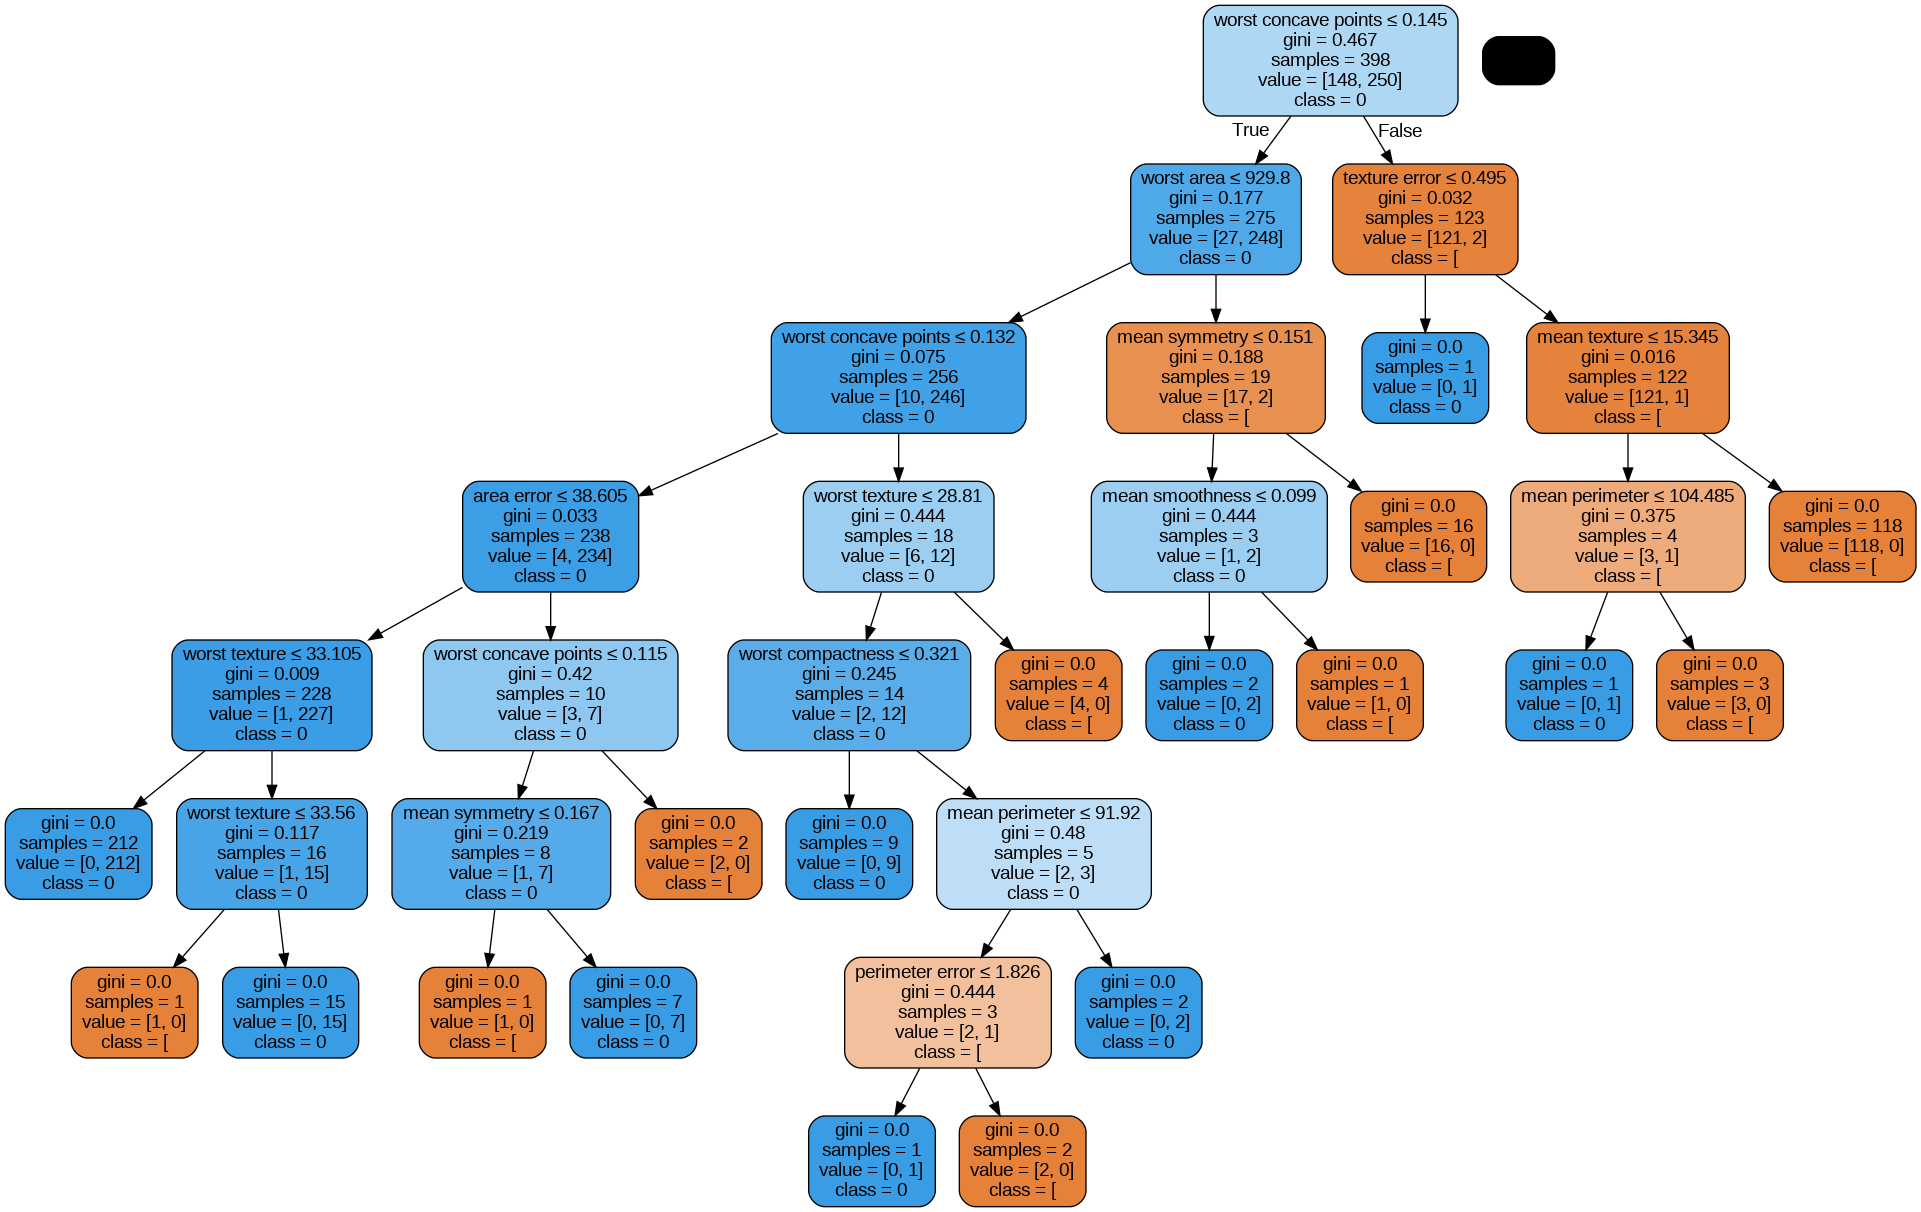

In [99]:
plot = pydotplus.graph_from_dot_data(tree_data)
Image(plot.create_png())

In [100]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,y_pred)

array([[59,  5],
       [12, 95]])

In [101]:
grid_model.best_estimator_.feature_importances_

array([0.        , 0.00260102, 0.0138045 , 0.        , 0.00717117,
       0.        , 0.        , 0.        , 0.02148992, 0.        ,
       0.        , 0.01049511, 0.00717117, 0.00900512, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.03529645, 0.        , 0.13930261, 0.        ,
       0.00553205, 0.        , 0.74813088, 0.        , 0.        ])